In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn import preprocessing as prep
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.read_csv('dataset_.csv')
df = df.drop(columns=['Day', 'Type'])

       F0     Fj     Fm     FI  F300mks  F50mks  t(Fm)        Vj        VI  \
0   0.810  1.652  3.203  2.749    1.562   0.942    166  0.351860  0.810280   
1   0.770  1.700  3.065  2.623    1.522   0.896    152  0.405229  0.807407   
2   0.800  1.701  2.981  2.680    1.528   0.894    195  0.413113  0.861990   
3   0.783  1.714  3.010  2.682    1.631   0.932    168  0.418051  0.852717   
4   0.879  1.805  2.016  1.914    1.678   1.061    116  0.814424  0.910290   
..    ...    ...    ...    ...      ...     ...    ...       ...       ...   
56  0.744  1.618  2.922  2.585    1.458   0.847    163  0.401286  0.845271   
57  0.827  1.941  2.800  2.616    1.721   0.947    130  0.564622  0.906741   
58  0.756  1.757  2.719  2.501    1.751   0.861    145  0.509934  0.888945   
59  0.710  1.456  2.818  2.454    1.304   0.790    163  0.353890  0.827324   
60  0.830  1.902  2.745  2.570    1.722   0.949    132  0.559791  0.908616   

    phi P0 (Fv/Fm)  ...    TR0/RC    DI0/RC    ET0/RC    RE0/RC

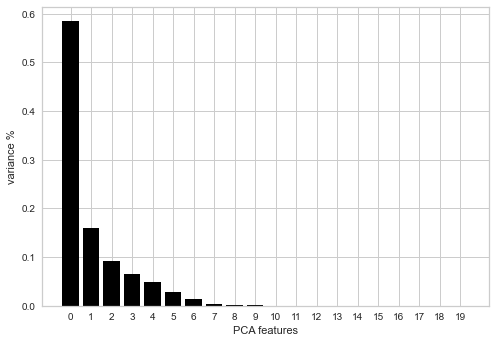

In [176]:
#x = RobustScaler().fit_transform(df)
#x = StandardScaler().fit_transform(df)
x = MinMaxScaler().fit_transform(df)
i=0
DF = pd.DataFrame()
for column in df.columns:
    series = pd.Series(x[:,i])
    DF.insert(i,column,series)
    i+=1
#print(DF)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(DF)
features = range(pca.n_components_)
variance = pca.explained_variance_ratio_
#print(variance)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

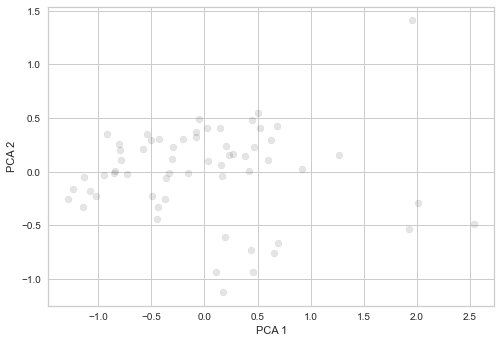

In [167]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

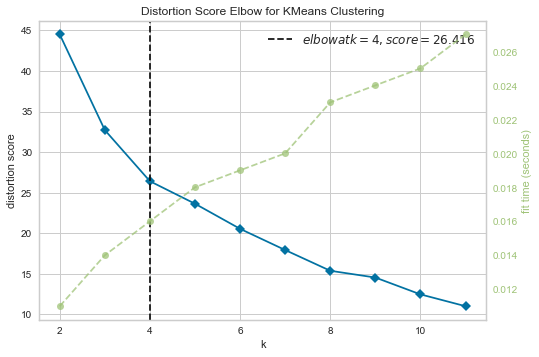

In [168]:
model_vis = KMeans()
visualizer = KElbowVisualizer(model_vis, k=(2,12), metric='distortion' )
visualizer.fit(x)
visualizer.show()

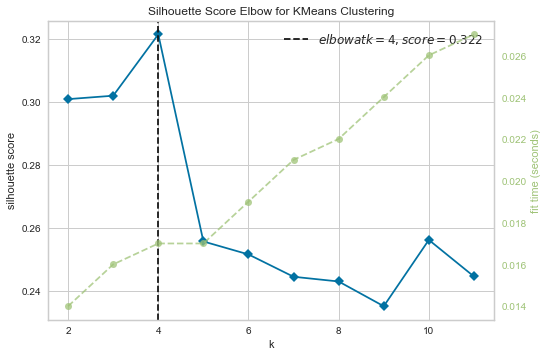

In [169]:
visualizer_ = KElbowVisualizer(model_vis, k=(2,12), metric='silhouette')
visualizer_.fit(x)
visualizer_.show()

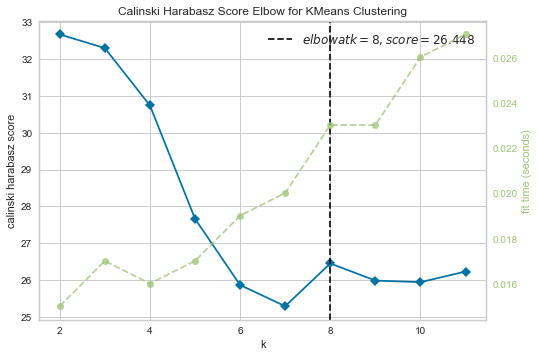

In [170]:
visualizer__ = KElbowVisualizer(model_vis, k=(2,12), metric='calinski_harabasz')
visualizer__.fit(x)
visualizer__.show()

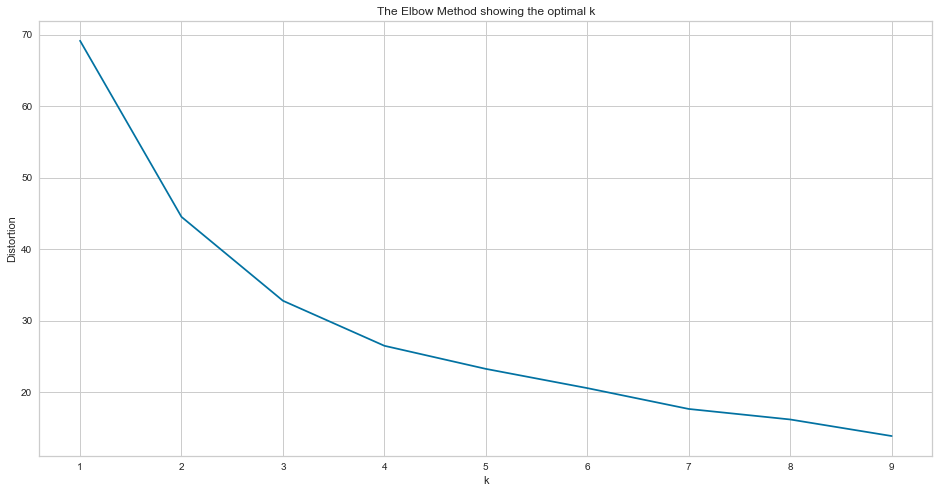

In [171]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

0: 2
1: 2
2: 2
3: 2
4: 3
5: 3
6: 3
7: 3
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 3
15: 0
16: 2
17: 1
18: 0
19: 2
20: 2
21: 1
22: 1
23: 1
24: 1
25: 1
26: 1
27: 2
28: 2
29: 2
30: 0
31: 0
32: 2
33: 0
34: 2
35: 0
36: 0
37: 0
38: 0
39: 0
40: 0
41: 0
42: 2
43: 2
44: 2
45: 2
46: 2
47: 2
48: 0
49: 2
50: 0
51: 2
52: 0
53: 0
54: 2
55: 2
56: 2
57: 0
58: 0
59: 2
60: 0
[2 2 2 2 3 3 3 3 0 0 0 0 0 0 3 0 2 1 0 2 2 1 1 1 1 1 1 2 2 2 0 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 2 2 0 2 0 2 0 0 2 2 2 0 0 2 0]


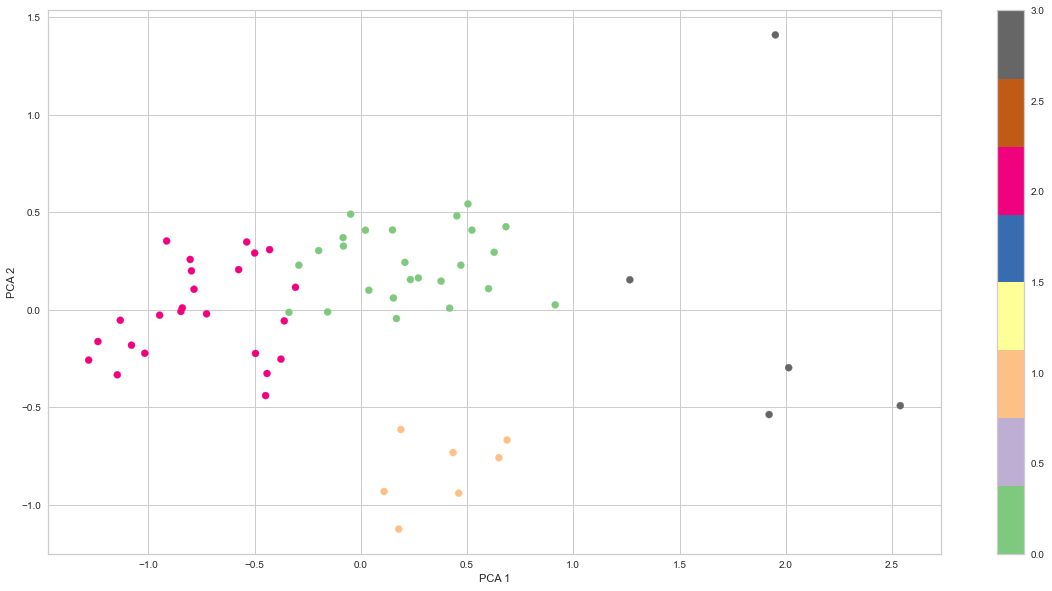

In [172]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(DF)
DF['cluster'] = y_kmeans
p = Counter(y_kmeans)
minim = min(p,key=p.get)
d = {}
d = Counter(y_kmeans)
#print(dict(d))
list_d = list(dict(Counter(y_kmeans)).items())
list_d.sort(key=lambda i: i[1])
arr = []
for i in range(4):
    arr.append(list_d[i][0])
for i in range(len(y_kmeans)):
    for j in range(len(arr)):
        if y_kmeans[i] == arr[j]:
            print(str(i) + ": " + str(y_kmeans[i]))
print(y_kmeans)
#colors = ['Red', 'Green', 'Blue', 'Pink', 'Cyan', 'Black', 'Purple', 'Magenta', 'Yellow']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(PCA_components[0], PCA_components[1], c=DF['cluster'], cmap='Accent',s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
#pd.plotting.parallel_coordinates(DF, 'cluster', color=colors)
#plt.show()